Dry


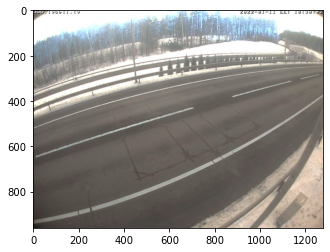

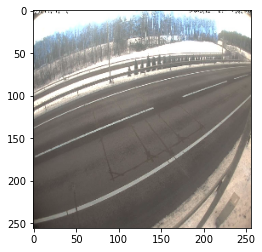

Slush


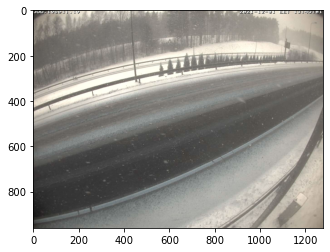

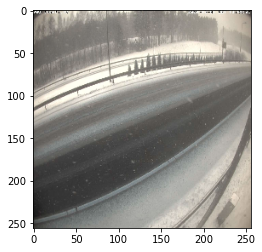

Snow


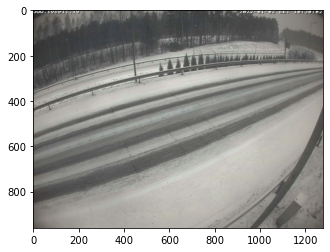

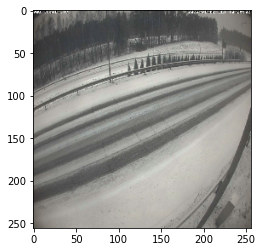

Wet


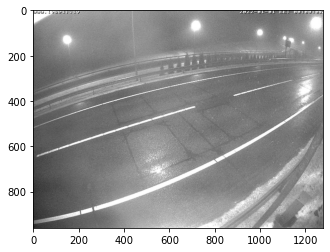

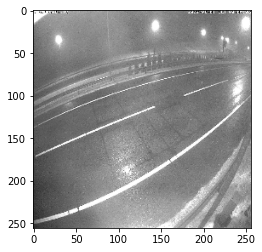

Image size (Width, Height, Dimensions) = (960, 1280, 3):
Resized Images to size 256x256


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


IMG_SIZE = 256 

DATADIR = r'C:\Users\Krisjanis\Desktop\BakalauraDarbs\road-surface-condition-assesment\model\dataset\train'
# CATEGORIES = ["Dry", "Ice", "Slush", "Snow", "Wet"]
CATEGORIES = ["Dry", "Slush", "Snow", "Wet"]

for category in CATEGORIES:
    print(category)
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        plt.imshow(new_array)
        plt.show()
        break

print("Image size (Width, Height, Dimensions) = {}:".format(img_array.shape))      
print("Resized Images to size {}x{}".format(IMG_SIZE, IMG_SIZE)) 


In [4]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import tensorflowjs as tfjs
from tensorflow.keras.callbacks import TensorBoard
import time

IMG_SIZE = 64 

NAME = "Model-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='Logs/{}'.format(NAME))

TRAINING_DIR = r'C:\Users\Krisjanis\Desktop\BakalauraDarbs\road-surface-condition-assesment\model\dataset\train'
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range = 40,
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      shear_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip = True,
      fill_mode = 'nearest')

VALIDATION_DIR = r'C:\Users\Krisjanis\Desktop\BakalauraDarbs\road-surface-condition-assesment\model\dataset\test'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='categorical',
    batch_size=50
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (IMG_SIZE, IMG_SIZE),
    class_mode = 'categorical',
    batch_size = 25
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image SIZE x SIZE with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'), # 3,3
    tf.keras.layers.MaxPooling2D(2, 2),  # 2, 2
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'softmax') # Number - class count
])


model.summary()

# rmsprop

model.compile(loss = 'categorical_crossentropy', optimizer ='rmsprop', metrics = ['accuracy'])

# after epochs - steps_per_epoch=20

history = model.fit(train_generator, epochs = 10, validation_data = validation_generator, verbose = 1, validation_steps = 3, callbacks=[tensorboard])

tfjs.converters.save_keras_model(model, r"C:\Users\Krisjanis\Desktop\BakalauraDarbs\road-surface-condition-assesment\model\models_nodejs")

model.save("models_h5\{}.h5".format(NAME))

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                       

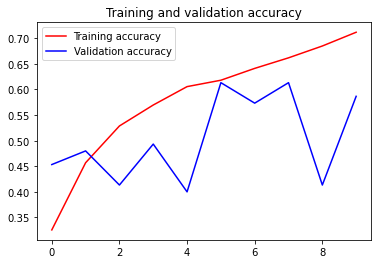

<Figure size 432x288 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [3]:
import tensorflow as tf

NAME = "model-name"

model = tf.keras.models.load_model("models_h5\{}.h5".format(NAME))

In [26]:
import cv2
import numpy as np

# CATEGORIES = ["Dry", "Ice", "Slush", "Snow", "Wet"]
CATEGORIES = ["Dry", "Slush", "Snow", "Wet"]

IMG_SIZE = 64 

img = cv2.imread('ImgForManualTests\Dry2.jpg')
img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
img = np.reshape(img, [1, IMG_SIZE, IMG_SIZE, 3])

predictions = model.predict(img) 
classes = np.argmax(predictions, axis = 1)

# prediction = model.predict_classes(img)

print('Predicted classification int value = {}'.format(classes[0]))
print('Predicted classification text value = {}'.format(CATEGORIES[int(classes[0])]))
print('-------------------------------------------')
print(predictions)

Predicted classification int value = 0
Predicted classification text value = Dry
-------------------------------------------
[[1.0000000e+00 0.0000000e+00 0.0000000e+00 3.8472406e-20]]


In [5]:
# To check model training logs.

# Open anaconda promt
# cd C:\Users\Krisjanis\Desktop\Bakalaura darbs\ImgClassification
# tensorboard --logdir=Logs
# w*

1
